**Data Science and AI for Energy Systems** 

Karlsruhe Institute of Technology

Institute of Automation and Applied Informatics

Summer Term 2024

---

# Exercise III: Stability analysis

**Imports**

In [118]:
# Imports
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp , odeint

## Problem II.2 (Programming) -- Calculating  Ljapunov exponents from time series

#### In this exercise we want to derive a deeper understanding of the concepts of stability applied on power grid systems. Therefore we look into dynamics of nonlinear and linear systems, calculate Lyapunov exponents of a dynamical system, perform a bifurcation analysis, and finally also consider a higher-dimensional dynamical system.

***
**(a) We consider a 1-node-infinite bus system 
\begin{align}\nonumber
    \frac{d\theta}{dt}&=\omega\\ \nonumber
    \frac{d\omega}{dt}&=P-c\omega - K\sin (\theta) 
\end{align}
with power feed in P, damping c and coupling K. <br>
Use the numerical ODE solver *scipy.integrate.odeint* to simulate data, given the $P=0.9$, $K=1$ and $c=1$, initial conditions $(\theta_0,\omega_0)$ = $(0.0,0.1)$, and for a time span $t=[0,20]$ with time steps of $0.1$.<br>
Plot the results in the $(\theta,\omega)$-plane, as well as in the $(t,\theta)-$ and the $(t,\omega)-$ plane.**

Solve the ODE numerically

In [119]:
P = 0.9
c = 1
K = 1

initial_conditions_nonlinear = [0.0,0.1]

def one_node_infinite_bus(x, t, P, c, K):
    x1,x2 = x
    return [x2,P - c*x2 - K*np.sin(x1)]

t = np.linspace(0, 20, 201)

#solve the ODE
sol_non_lin = odeint(one_node_infinite_bus, y0=initial_conditions_nonlinear, t=t,args=(P,c,K))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


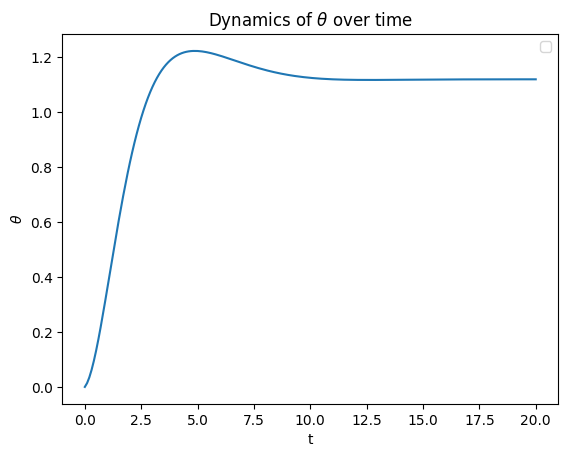

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


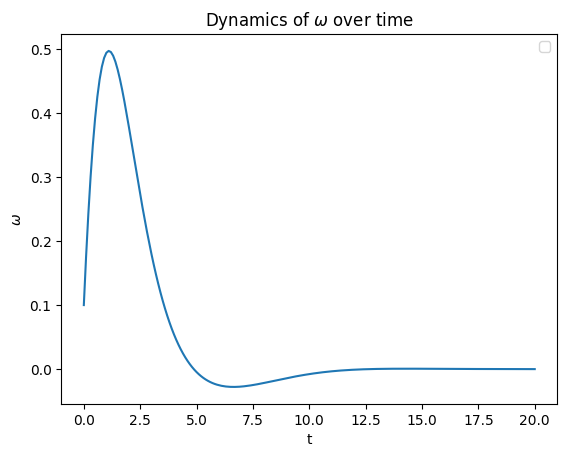

Text(0, 0.5, '$\\omega$')

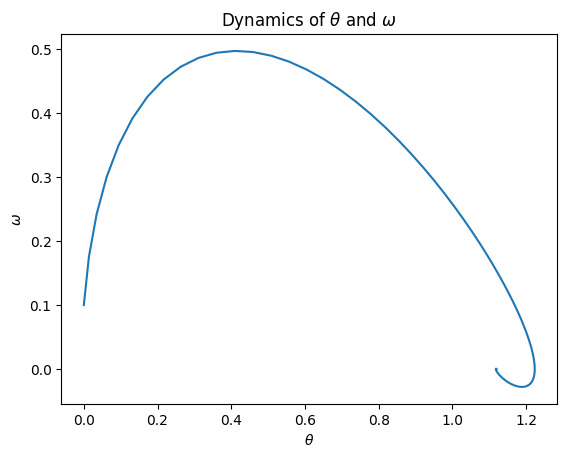

In [120]:
plt.plot(t,sol_non_lin[:,0])
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.title(r'Dynamics of $\theta$ over time')
plt.legend()
plt.show()

plt.plot(t,sol_non_lin[:,1])
plt.xlabel('t')
plt.ylabel(r'$\omega$')
plt.title(r'Dynamics of $\omega$ over time')
plt.legend()
plt.show()

plt.plot(sol_non_lin[:,0],sol_non_lin[:,1])
plt.title(r'Dynamics of $\theta$ and $\omega$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')

***
**(b) Compare the result from (a) to the results of the linearization: Consider the system 
\begin{align*}
    \begin{pmatrix}
        \theta\\\omega
    \end{pmatrix}'&=\text{J} \begin{pmatrix}
        \theta\\\omega
    \end{pmatrix},
\end{align*}
where $J$ is the Jacobian at the stable fixed point of (1).
Solve the equation for the same choice of parameters as in (a), and use the same method for solving the equation. <br>
Plot the results as in (a), in order to compare the results from the original system and its linearization.**

We use the linearized model to compare the results, therefore we calculate the linearized ODE for $\delta x(t) = x(t)-x^*$ for $x(t) = (\theta(t),\omega(t))$ and the fixed point $(\arcsin(P/K),0)$. For details, see slide 34 in lecture 3.

In [121]:
P = 0.9 
c = 1
K = 1

# We use the linearized model to compare the results, therefore in the linear ODE we consider the dynamics of delta

# We subtract the fixed point to obtain the linearized model 
initial_conditions_linear = [0-np.arcsin(P/K),0.1-0]

def one_node_infinite_bus_linear(x, t, P = 0.1, c = 0.1, K = 0.1):
    x1,x2 = x
    return [x2,(-c*x2 - K*np.cos(np.arcsin(P/K))*(x1))]

t = np.linspace(0, 20, 201)

sol_lin = odeint(one_node_infinite_bus_linear, y0= initial_conditions_linear, t=t,args=(P,c,K))

# we add the fixed point to the linearized solution
sol_lin[:,0] = sol_lin[:,0]+np.arcsin(P/K)
sol_lin[:,1] = sol_lin[:,1]+0 # this step is of course actually not necessary as the omega-coordinate of the fixed point is 0

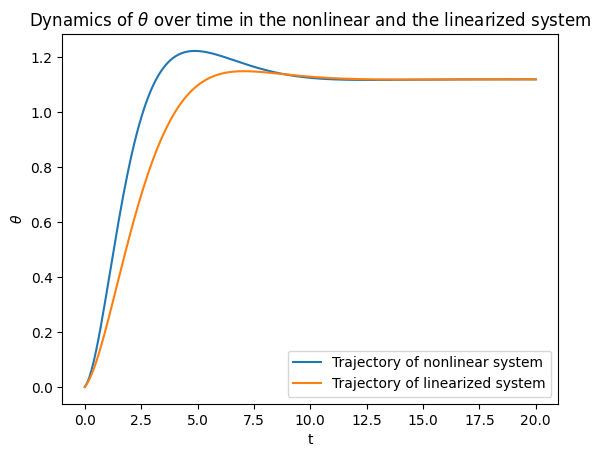

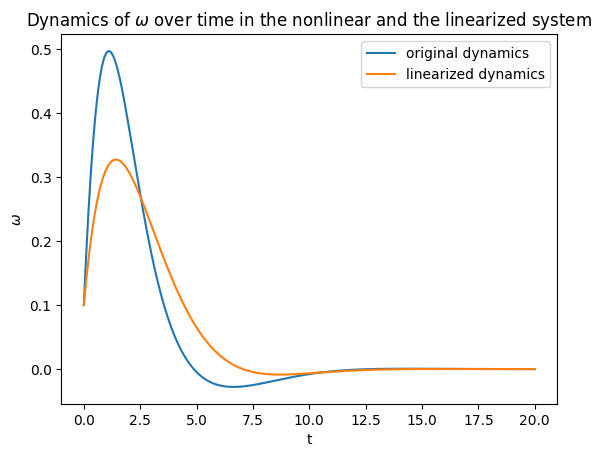

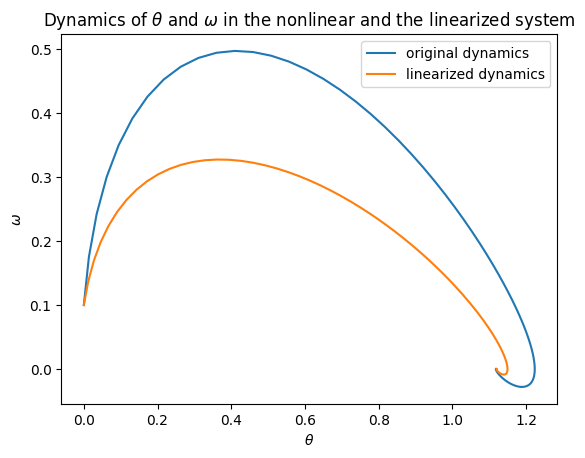

In [122]:
plt.plot(t,sol_non_lin[:,0], label='Trajectory of nonlinear system')
plt.plot(t,sol_lin[:,0], label='Trajectory of linearized system')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.title(r'Dynamics of $\theta$ over time in the nonlinear and the linearized system')
plt.legend()
plt.show()

plt.plot(t,sol_non_lin[:,1], label='original dynamics')
plt.plot(t,sol_lin[:,1], label='linearized dynamics')
plt.xlabel('t')
plt.ylabel(r'$\omega$')
plt.title(r'Dynamics of $\omega$ over time in the nonlinear and the linearized system')
plt.legend()
plt.show()

plt.plot(sol_non_lin[:,0],sol_non_lin[:,1], label='original dynamics')
plt.plot(sol_lin[:,0],sol_lin[:,1], label='linearized dynamics')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.title(r'Dynamics of $\theta$ and $\omega$ in the nonlinear and the linearized system')
plt.legend()
plt.show()

#### Short addition:
Not that the linearization is not necessarily useful for all initial conditions and parameter valus. For example for $P=K$, see the following dynamics of the nonlinear and the linearized system:  

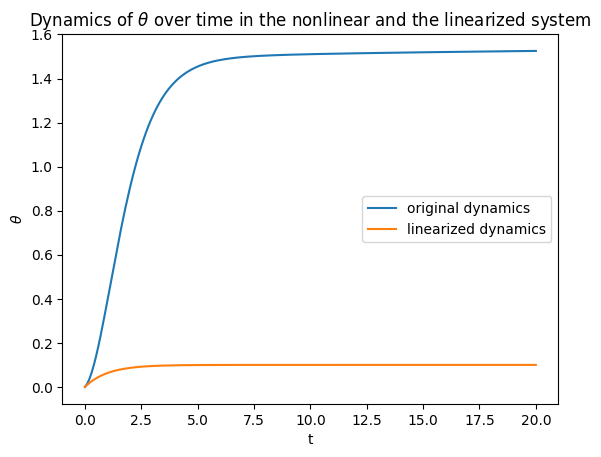

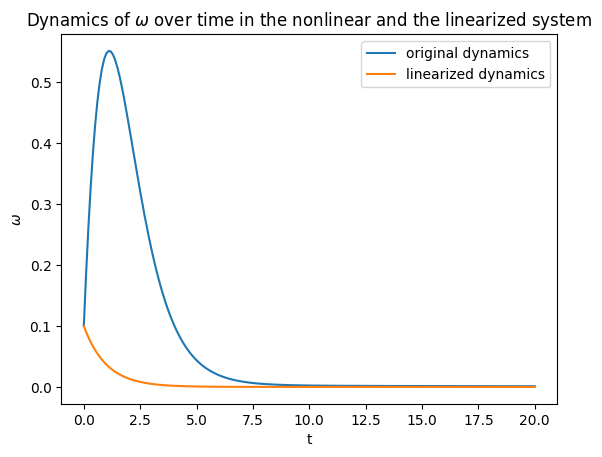

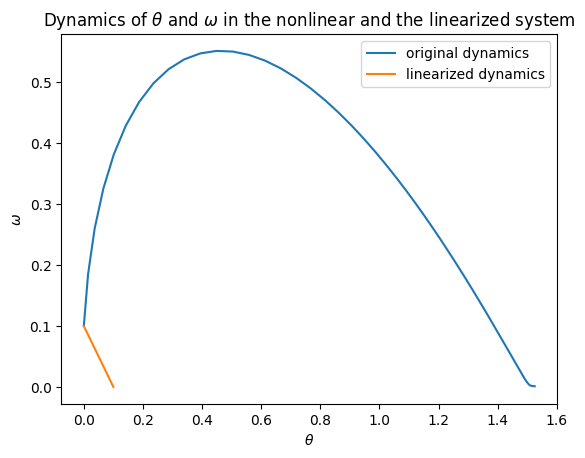

In [123]:
P = 1
c = 1
K = 1

initial_conditions_nonlinear = [0.0,0.1]
t = np.linspace(0, 20, 201)

#solve the ODE
sol_non_lin = odeint(one_node_infinite_bus, y0=initial_conditions_nonlinear, t=t,args=(P,c,K))

initial_conditions_linear = [0-np.arcsin(P/K),0.1-0]

sol_lin = odeint(one_node_infinite_bus_linear, y0= initial_conditions_linear, t=t,args=(P,c,K))

# we add the fixed point to the linearized solution
sol_lin[:,0] = sol_lin[:,0]+np.arcsin(P/K)
sol_lin[:,1] = sol_lin[:,1]+0 # this step is of course actually not necessary as the omega-coordinate of the fixed point is 0

plt.plot(t,sol_non_lin[:,0], label='original dynamics')
plt.plot(t,sol_lin[:,0], label='linearized dynamics')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.title(r'Dynamics of $\theta$ over time in the nonlinear and the linearized system')
plt.legend()
plt.show()

plt.plot(t,sol_non_lin[:,1], label='original dynamics')
plt.plot(t,sol_lin[:,1], label='linearized dynamics')
plt.xlabel('t')
plt.ylabel(r'$\omega$')
plt.title(r'Dynamics of $\omega$ over time in the nonlinear and the linearized system')
plt.legend()
plt.show()

plt.plot(sol_non_lin[:,0],sol_non_lin[:,1], label='original dynamics')
plt.plot(sol_lin[:,0],sol_lin[:,1], label='linearized dynamics')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.title(r'Dynamics of $\theta$ and $\omega$ in the nonlinear and the linearized system')
plt.legend()
plt.show()

# --- Optional (content was not part of the lecture) ---<br>
**(c) Estimate the largest Lyapunov exponent using the Rosenstein  method (use *nolds.lyap\_r*): We consider as in (a) a 1-node-infinite bus system, here we set $P = 0.2, c = 3$ and $K = 1$, initial conditions $(\theta_0,\omega_0) = (0.0,0.1)$, and a time span $t=[0,100]$ with time steps of $0.1$. <br>
Consider we observe the solution of $\frac{d\omega}{dt}$ and want to use this observation to calculate the largest Lyapunov exponent. Solve the differential equation analogously to (a) and use the solution for omega as input for the function *nolds.lyap\_r* which gives the largest Lyapunov exponent. Then compare the value with the largest eigenvalue of the Jacobian at the stable fixed point, what do you notice?**
___

In [124]:
# As this topic was not presented in the lecture, we leave out this exercise.

***
**(d) Bifurcation analysis: We consider fixed $K=1$ and $c=5$, and regard the dynamics of the equilibria of the one-node-infinite bus system depending on the power feed in $P$. Assume $P$ as variable, with values ranging from $0$ to $2$ with steps of $0.0001$.<br>
Use the linearization of the system: For which $P$ do real-values fixed points exist, and which fixed points are stable? Herefore, plot a bifurcation diagram, with the values of $P$ on the x-axis and the $\theta-$ values of fixed points on the y-axis.<br>
*Hint:* You should obtain a saddle-node bifurcation.**

Check that for $P<K$ we have a stable node/sink (see lecture 3, slide 25):
We see $c^2 - 4K\cos(\arcsin(P/K)) \geq  c^2 - 4K = 25- 4 > 0.$ 

We use from Exercise III.1, that the fixed points are given as $(\theta_1^*,\omega_1^*) = (\arcsin(\frac{P}{K}),0)$ and $(\theta_2^*,\omega_2^*) = (\pi - \arcsin(\frac{P}{K}),0)$.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


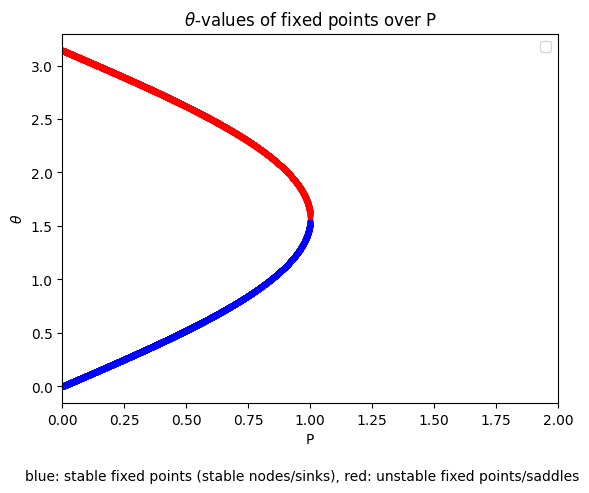

In [125]:
c = 5
K = 1

fixed_point_1 = []
fixed_point_2 = []
P_range = np.arange(0,2,0.0001) 
for P in P_range:
    # the fixed points are only defined for K>P
    if K>P: 
        # for the calculation of the fixed points see Exercise III.1
        fp1 = np.arcsin(P/K)%(2*np.pi)
        fixed_point_1.append(fp1)
        fp2 = (np.pi - fp1)%(2*np.pi)
        fixed_point_2.append(fp2)

        # We plot only fixed points where the eigenvalues of the Jacobian are real, in order to obtain the saddles and the stable nodes/sinks
        if c**2-4*K*np.cos(fp1)> 0:
            # Check if the eeigenvalues are negative, note that the eigenvalue 0.5*(-c - np.sqrt(c**2-4*K*np.cos(fp1))) is always negative
            if 0.5*(-c + np.sqrt(c**2-4*K*np.cos(fp1))) < 0:
                col1 = 'b.'
            else:
                col1 = 'r.'

        # the analogous procedure for the second fixed point
        if c**2-4*K*np.cos(fp2)> 0:
            if 0.5*(-c + np.sqrt(c**2-4*K*np.cos(fp2))) < 0:
                col2 = 'b.'
            else:
                col2 = 'r.'
        plt.plot(P,fp1,col1)
        plt.plot(P,fp2,col2)
    else:
        fixed_point_1.append(np.nan)
        fixed_point_2.append(np.nan)

'''
As cos(fp2)<0 for every fp2, the fixed points fp2 are always unstable (see Exercise III.1)
In especially: -c+np.sqrt(c**2-4*K*np.cos(fp2)) > 0 for every fp2

As seen in Exercise III.1, the fixed points fp1 are stable nodes/sinks for P<K, as it is c^2 - 4K\cos(\arcsin(P/K)) > 0.
'''

plt.xlim(0,2)
plt.xlabel('P') 
plt.ylabel(r'$\theta$')
plt.title(r'$\theta$-values of fixed points over P')
fig = plt.gcf()
fig.text(.5, -.05, 'blue: stable fixed points (stable nodes/sinks), red: unstable fixed points/saddles', ha='center')
plt.legend()

### Alternatively we can use the results from Exercise III.1 directly, and don't have to determine the stability in the algorithm. This method is a lot faster:

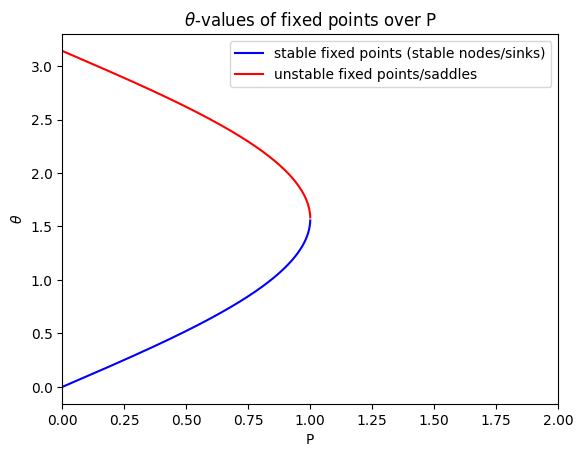

In [127]:
c = 5
K = 1

fixed_point_1 = []
fixed_point_2 = []
P_range = np.arange(0,2,0.0001)
for P in P_range:
    if K>P:
        fp1 = np.arcsin(P/K)%(2*np.pi)
        fixed_point_1.append(fp1)
        fp2 = (np.pi - fp1)%(2*np.pi)
        fixed_point_2.append(fp2)
    else:
        fixed_point_1.append(np.nan)
        fixed_point_2.append(np.nan)

'''
As seen in Exercise III.1, the fixed points fp1 are stable nodes/sinks for P<K, as it is c^2 - 4K\cos(\arcsin(P/K)) > 0.

As cos(fp2)<0 for every fp2, the fixed points fp2 are always unstable (see Exercise III.1)
In especially: -c+np.sqrt(c**2-4*K*np.cos(fp2)) > 0 for every fp2

'''

plt.xlim(0,2)
plt.plot(P_range,fixed_point_1, color = 'blue', label = 'stable fixed points (stable nodes/sinks)')
plt.plot(P_range,fixed_point_2, color = 'red', label = 'unstable fixed points/saddles')
plt.xlabel('P') 
plt.ylabel(r'$\theta$')
plt.title(r'$\theta$-values of fixed points over P')
plt.legend()

# ___ Optional (the exercise was not done in the exercise session) ___<br>
(e) As we now analyzed the stability of a one-node-infinite-bus system, we also want to take a look into n-node systems. The equations for the voltage angles resp. the frequency deviations are given as
\begin{align}\nonumber
    \frac{d\theta_i}{dt}&=\omega_i\\
    \frac{d\omega_i}{dt}&=P_i-c_i\omega_i - \sum_{j=1}^{n}K_{i,j}\sin (\theta_i - \theta_j) \tag{2}
\end{align}
for $i=1,\ldots,n$.<br>
Derive analogously to the 1-node case a function depending on the parameters and the initial values, that can solve the ODE system (2) numerically. Test your function for $n=3$ with some self-chosen parameters and initial values for the $\theta_i$'s and $\omega_i$'s and plot the resulting solutions.

Note: This exercise is optional as it was not done in the exercise session. However the solution is presented, so you can take a look at it and try it out yourself.

In [128]:
'''We first write a function that states the ODE equations for the n-node system:'''
def ODE_equations(variables, t, power, damping, coupling, number_of_nodes=3):
    theta = variables[0:number_of_nodes] # the first number_of_nodes variables are the phases
    omega = variables[number_of_nodes:] # the next number_of_nodes variables are the angular velocities

    dydt = []
    for i in range(number_of_nodes):
        phaseDynamics=omega[i]
        dydt.append(phaseDynamics)
    # we also include the one-node case here
    if number_of_nodes==1:
        i=0
        velocityDynamics=power[i]-damping[i]*omega[i]-coupling[i,i]*np.sin(theta[i])
        dydt.append(velocityDynamics)   
    else:
        for i in range(number_of_nodes):
            velocityDynamics=power[i]-damping[i]*omega[i]-sum(coupling[i,j]*np.sin(theta[i]-theta[j]) for j in range(number_of_nodes))
            dydt.append(velocityDynamics)    
        return dydt
    
''' In the next step we write a function that solves the ODEs for the n-node system:'''
def solve_n_node_ode(initial_conditions,power,damping,coupling,number_of_nodes=3):
    sol = odeint(ODE_equations, y0 = initial_conditions, t=t,args=(power,damping,coupling,number_of_nodes))
    return sol

Now we test our function with some example values for 3 nodes:

In [129]:
numberOfNodes=3
power=np.array([-1,2,-1])
damping=np.array([0.05,0.1,0.5])*10
coupling=np.array([[1,1,1],[1,1,1],[1,1,5]])*2
initialAngle=np.array([0,0,0])
initialVelocity=np.array([0,0,0])
t = np.linspace(0, 20, 5001)
initial_conditions = np.concatenate((initialAngle, initialVelocity), axis=0)
sol = solve_n_node_ode(initial_conditions,power,damping,coupling,numberOfNodes)

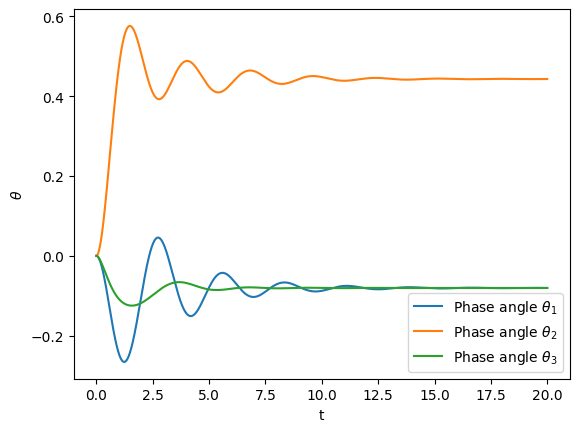

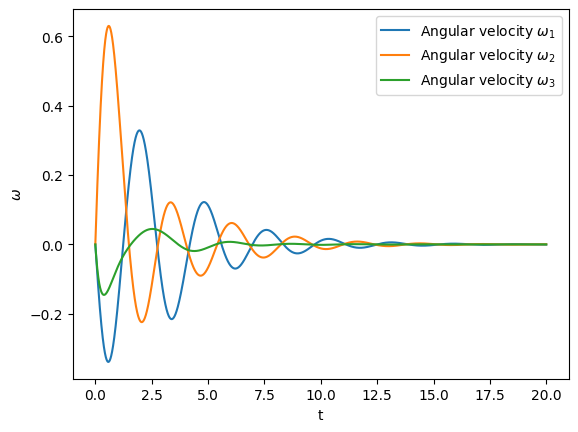

In [130]:
#Plot the angles over time
for i in range(numberOfNodes):
    plt.plot(t, sol[:,i], label = r'Phase angle $\theta_{%s}$' % (i+1))
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.legend()
plt.show()

#Plot the angular velocity over time
for i in range(numberOfNodes):
    plt.plot(t, sol[:,numberOfNodes+i], label = r'Angular velocity $\omega_{%s}$' % (i+1))
plt.xlabel('t')
plt.ylabel(r'$\omega$')
plt.legend()
plt.show()